# Pneumonia detection using Convolutional neural networks

## Objective :

##### Pneumonia is a serious lung infection caused by bacteria, viruses, or fungi, and it is a significant cause of death, particularly in children under five years old and in the elderly. Chest X-rays are the primary tool used by radiologists to detect pneumonia and identify the affected areas in the lungs.

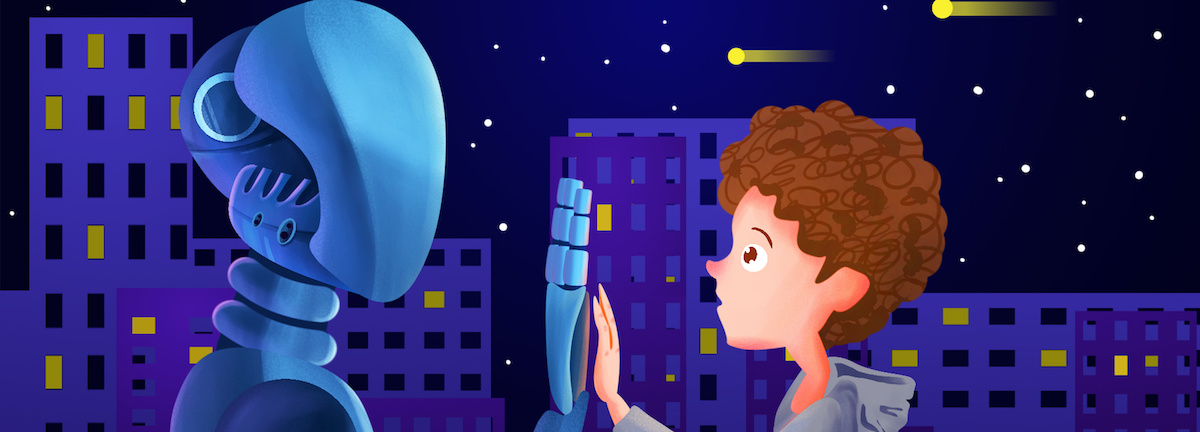

##### The main objective of this project is to develop a deep learning model, specifically a Convolutional Neural Network (CNN), to accurately detect pneumonia from chest X-ray images. This model aims to assist doctors by providing a quick and reliable diagnosis, enabling timely treatment for patients. By training the CNN on a well-curated dataset of chest X-ray images, the model can learn to distinguish between healthy and infected lungs with high accuracy.

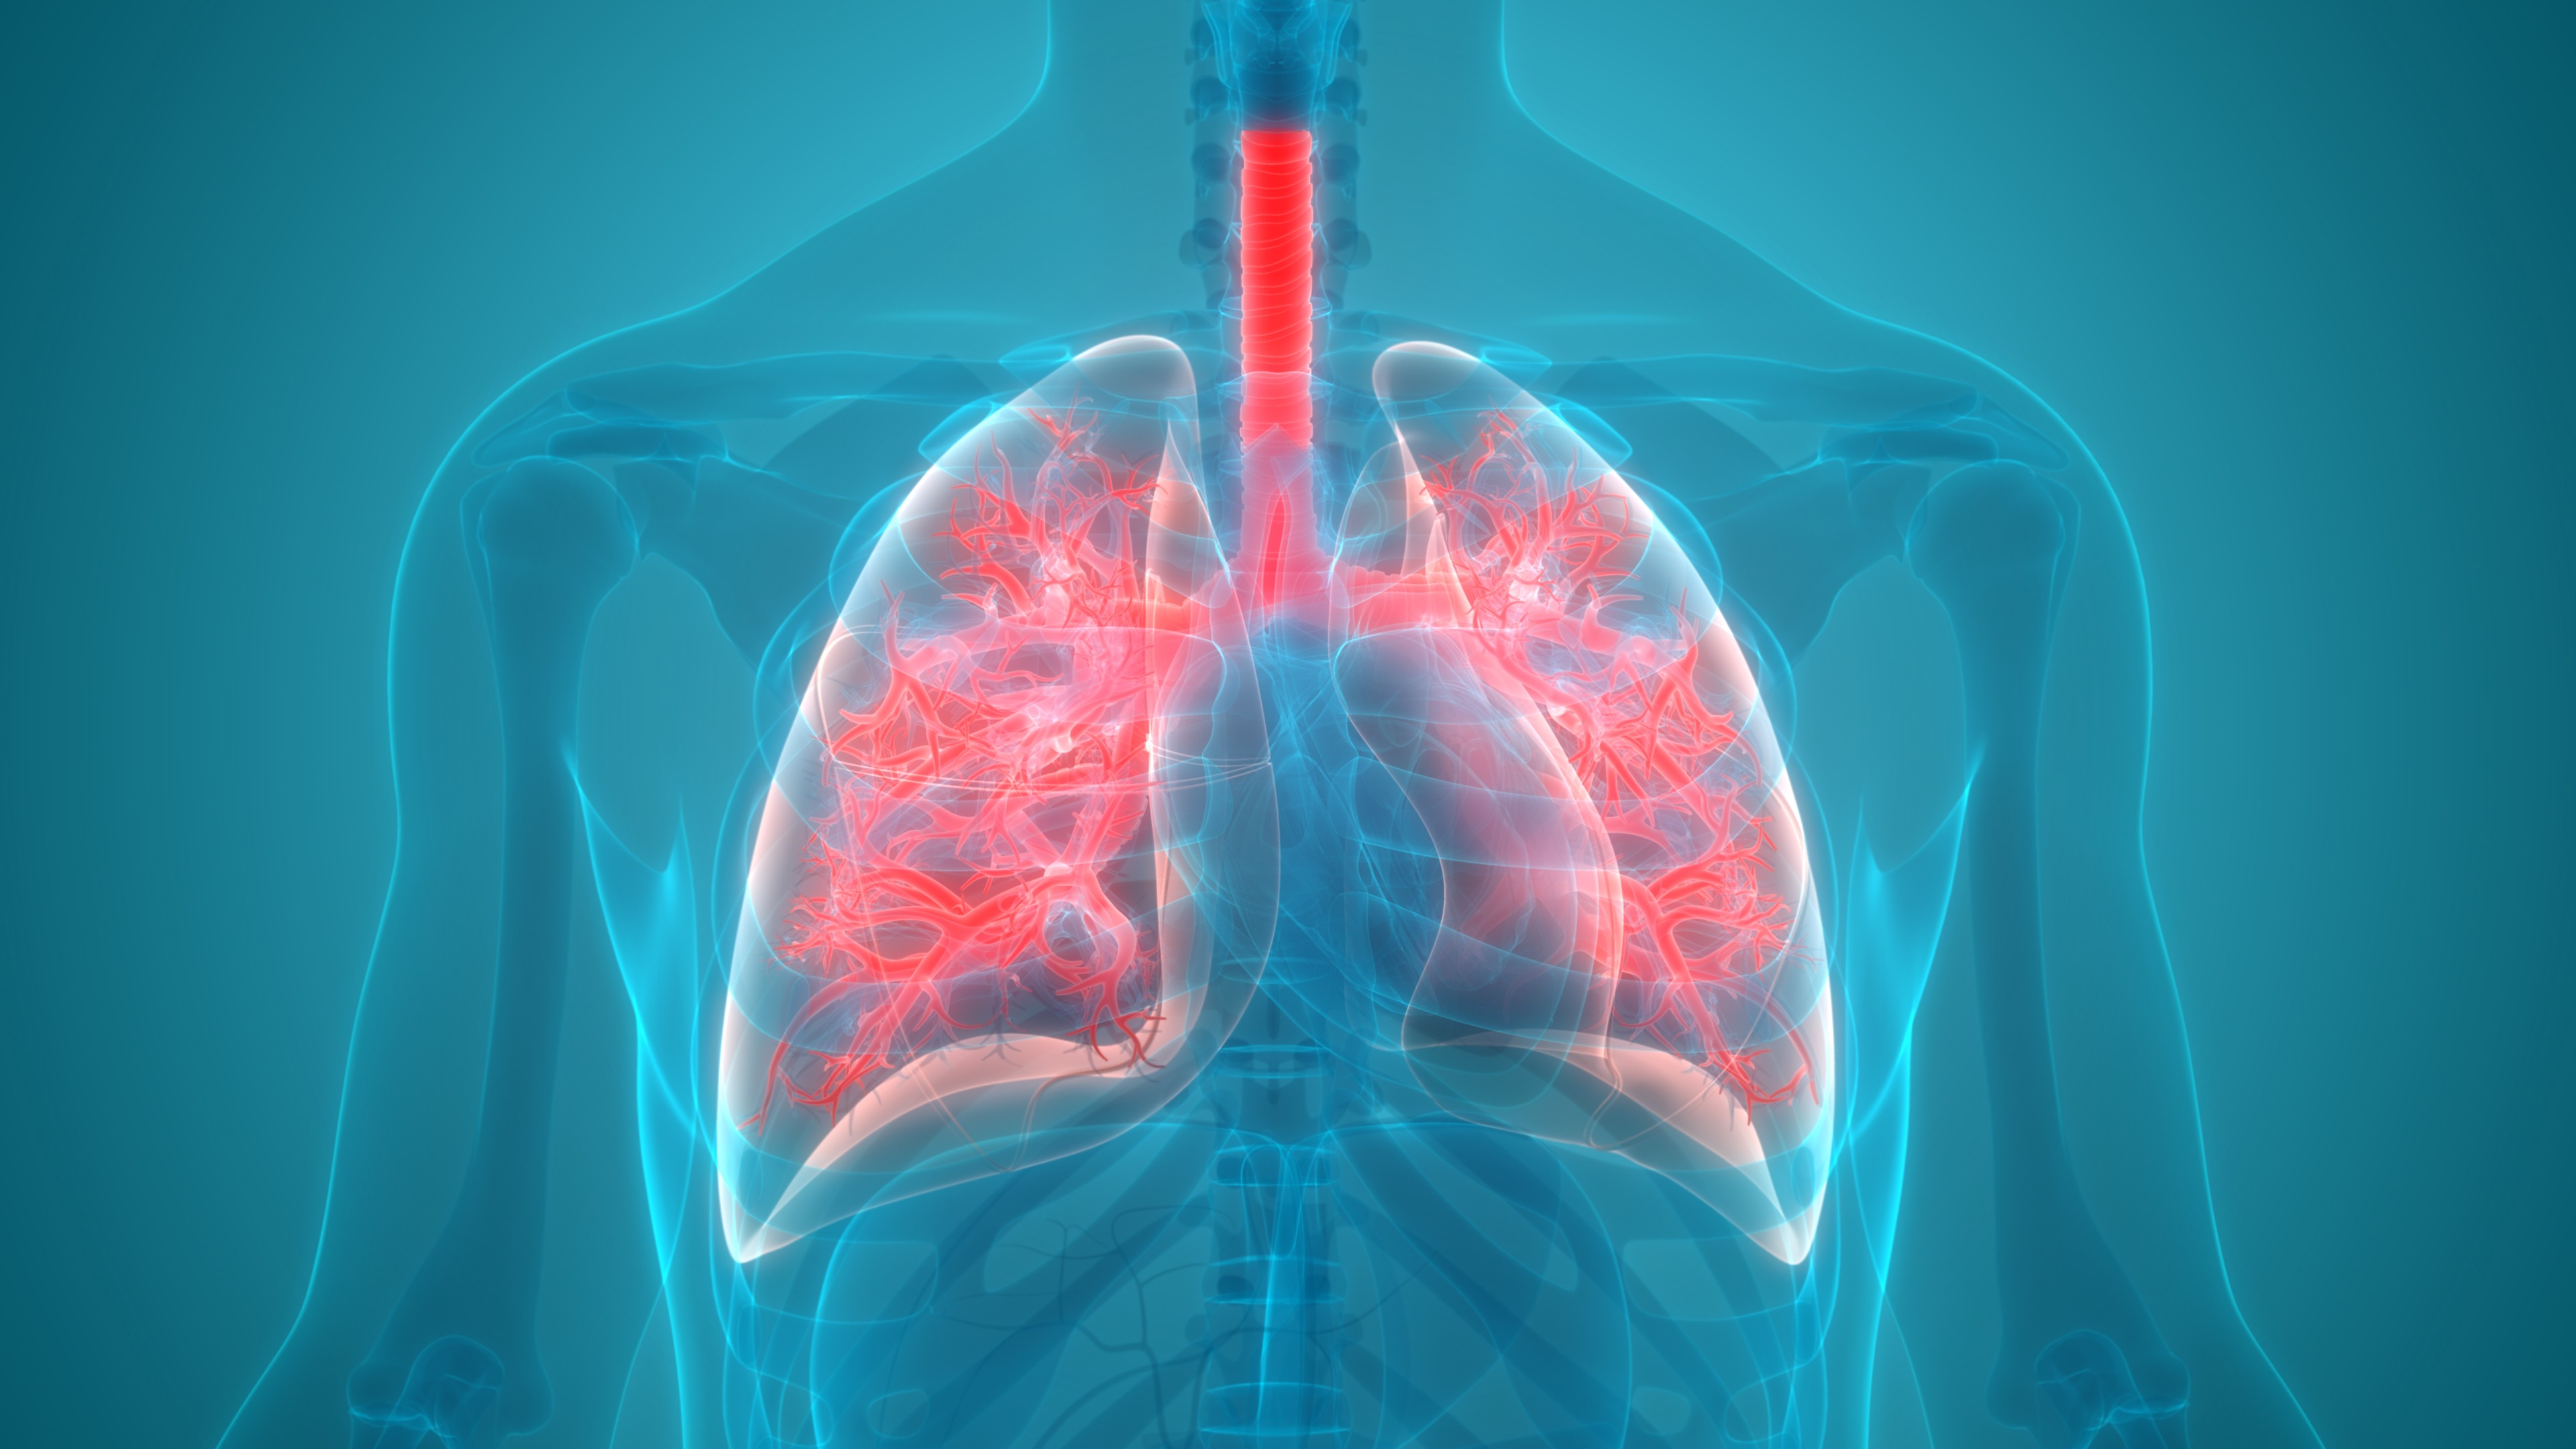

##### By integrating advanced technology with medical expertise, this project aims to enhance the accuracy and efficiency of pneumonia detection, ultimately saving lives.

##### The dataset used here is chest xray dataset which is preprocessed. You can find the Dataset <a href="https://universe.roboflow.com/mohamed-traore-2ekkp/chest-x-rays-qjmia/dataset/4"> here.</a>

##### The dataset consists of:
1. *Training imagess* are 12,229 of which 8,917 are of Pneumonia and 3,312 are normal images..
2. Testing imagesys are 582 of which 411 are of Pneumonia and 171 are normal.ance.
al.

In [1]:
!pip install tensorflow
!pip install opencv-python
!pip install keras

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


##### Librarie used :
tensorflow: An open-source platform for machine learning and deep learning developed by Google.

In [2]:
!pip install numpy tensorflow matplotlib keras opencv-python


Defaulting to user installation because normal site-packages is not writeable


Libraries used :

Numpy : Used for multidimensional arrays.

Matplotlib : Used to visualize data with graphs.

cv2 : OpenCV is used to deal with images.

Keras : It is the interface for Neural Networks and Tensorflow.

tensorflow: An open-source platform for machine learning and deep learning developed by Google

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# ImageDataGenerator has moved to tf.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2
from tensorflow.keras.preprocessing.image import img_to_array 

##### Creating the train data generator.


In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

##### Training data which is present 

In [5]:
train_images = "/Users/SYED INAM/Downloads/Chest X-Rays.v4i.folder/train"

Here every image is resized to (300,300)

In [6]:
train_generator = train_datagen.flow_from_directory(train_images,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 12229 images belonging to 2 classes.


Model outputs :

0 : Normal condition

1 : Pneumonia condition

In [7]:
train_generator.class_indices


{'NORMAL': 0, 'PNEUMONIA': 1}

##### Validation data generator and loading validation data

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory('/Users/SYED INAM/Downloads/Chest X-Rays.v4i.folder/valid',
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 1165 images belonging to 2 classes.


##### Plotting : Images with Pneumonia from dataset.

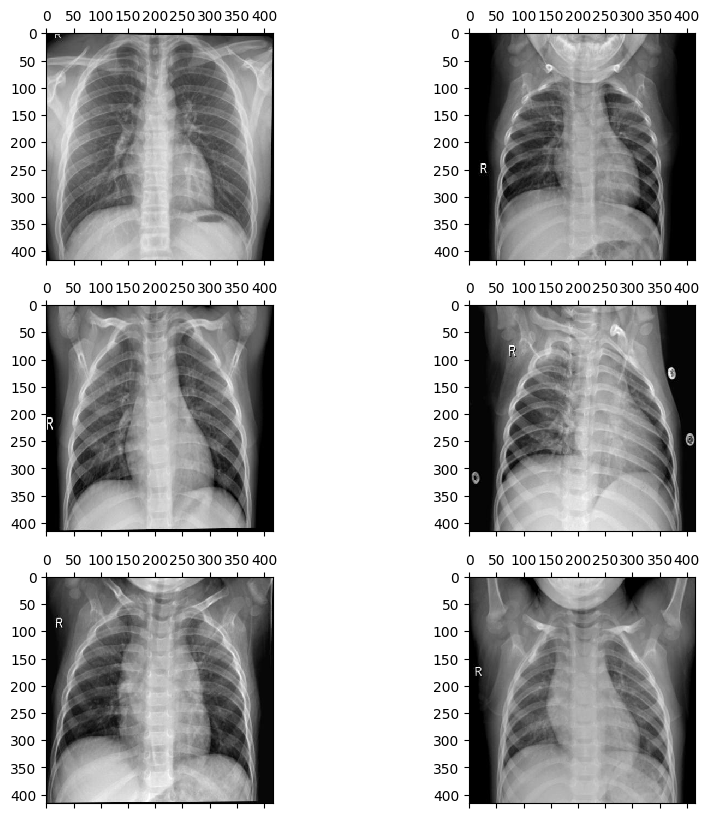

In [9]:
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[41]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))
plot5.matshow(plt.imread(train_generator.filepaths[2679]))
plot6.matshow(plt.imread(train_generator.filepaths[2710]))

##### Plotting : Images without Pneumonia from dataset.

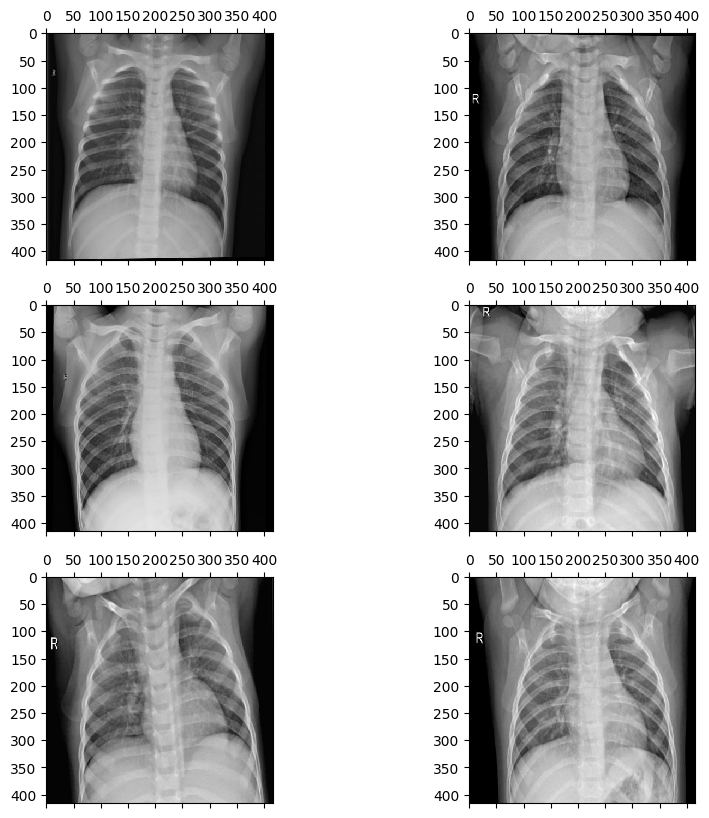

In [10]:
#Normal
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[1419]))
plot2.matshow(plt.imread(train_generator.filepaths[1365]))
plot3.matshow(plt.imread(train_generator.filepaths[1400]))
plot4.matshow(plt.imread(train_generator.filepaths[1350]))
plot5.matshow(plt.imread(train_generator.filepaths[1345]))
plot6.matshow(plt.imread(train_generator.filepaths[1349]))

# Convolutional Neural Network


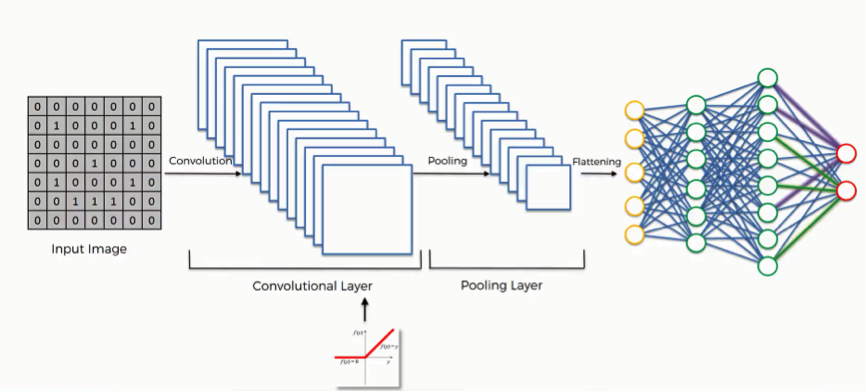

CNN consists of Convolutional layers, pooling layers.

ANN consists of hidden layers and output layers.

To develop the model I have used 5 Conv2D layers which are followed by maxpooling layers for every Conv2D layer.

Then for classification Artificial Neural Network with 2 hidden layers and one output layer which has a single neuron is used.

##### Activation function :

ReLU is used in the hidden layers and Conv2D layers.

Sigmoid is used because the output we need is of binary classification.

Loss function : Binary cross entropy is used.


Optimizer : Adam optimizer is used because it gives best result.

# Neural Networks using TensorFlow

Metrics : Accuracy.

In [11]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

C:\Users\SYED INAM\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,983,009 (7.56 MB)

 Trainable params: 1,983,009 (7.56 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model for 50 epochs

In [12]:
history = model.fit(train_generator, epochs = 50, validation_data = validation_generator)

C:\Users\SYED INAM\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7191 - loss: 0.5888

C:\Users\SYED INAM\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 877s 9s/step - accuracy: 0.7197 - loss: 0.5878 - val_accuracy: 0.9116 - val_loss: 0.2346
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 590s 6s/step - accuracy: 0.8734 - loss: 0.3034 - val_accuracy: 0.9442 - val_loss: 0.1487
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 586s 6s/step - accuracy: 0.9187 - loss: 0.2041 - val_accuracy: 0.9047 - val_loss: 0.2334
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 580s 6s/step - accuracy: 0.9264 - loss: 0.1970 - val_accuracy: 0.9536 - val_loss: 0.1281
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 619s 6s/step - accuracy: 0.9357 - loss: 0.1726 - val_accuracy: 0.9622 - val_loss: 0.1052
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 594s 6s/step - accuracy: 0.9333 - loss: 0.1725 - val_accuracy: 0.9562 - val_loss: 0.1321
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 554s 6s/step - accuracy: 0.9433 - loss: 0.1463 - val_accuracy: 0.9605 - val_loss: 0.0948
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 558s 6s/step - accuracy: 0.9413 - loss: 0.1481 - val_accuracy: 0.9631 - val_loss: 0.

### Accuracy : 98.16%

### Val_accuracy : 100%

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']

## Plotting Loss Vs Num. of Epochs

Loss Vs Num. of Epochs
Training Loss : 0.0519 
Value loss : 0.0701


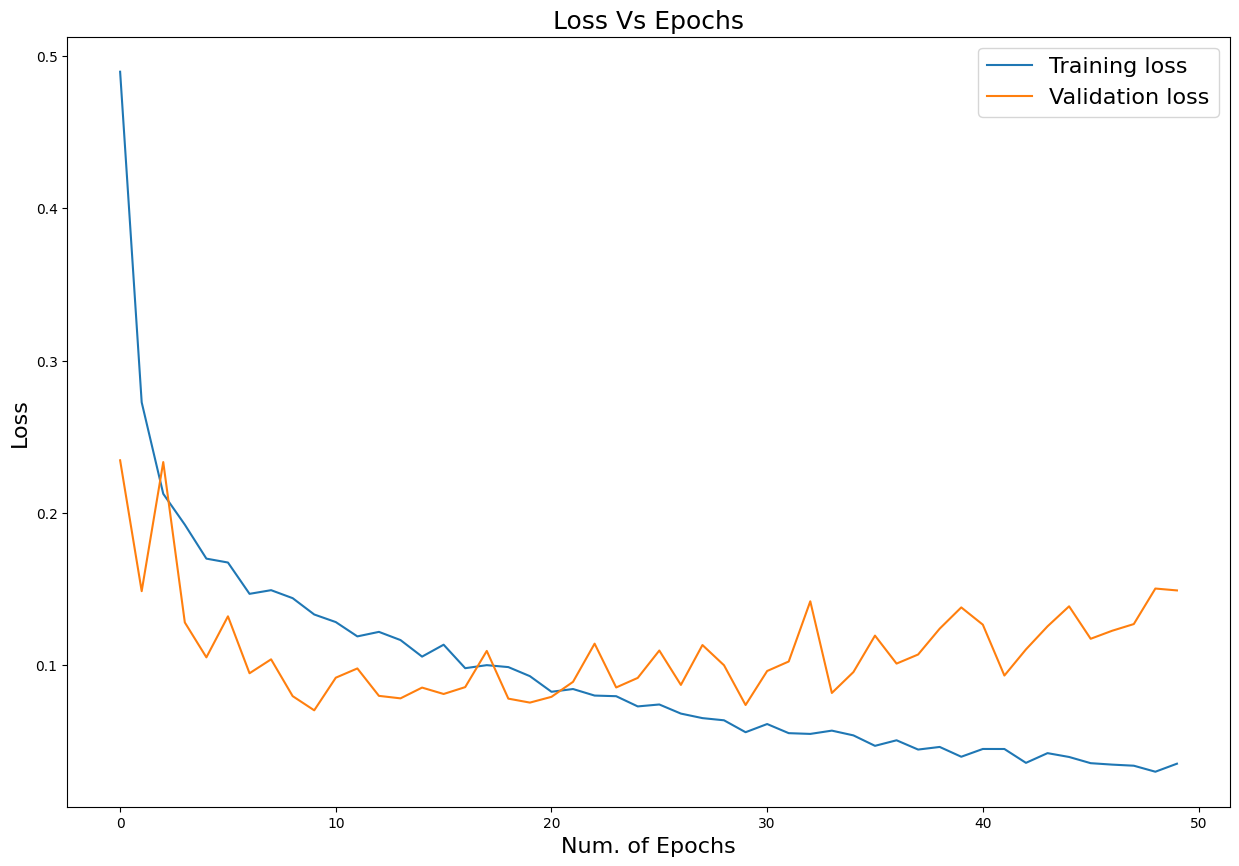

In [14]:
plt.figure(figsize=(15, 10))
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Training loss','Validation loss'], fontsize=16)
plt.title("Loss Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
print("Loss Vs Num. of Epochs")
print("Training Loss : 0.0519","\nValue loss : 0.0701")
plt.show()

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

## Plotting Accuracy Vs Num. of Epochs

Accuracy Vs Epochs
Training accuracy : 0.9816 
Value accuracy : 1.0000


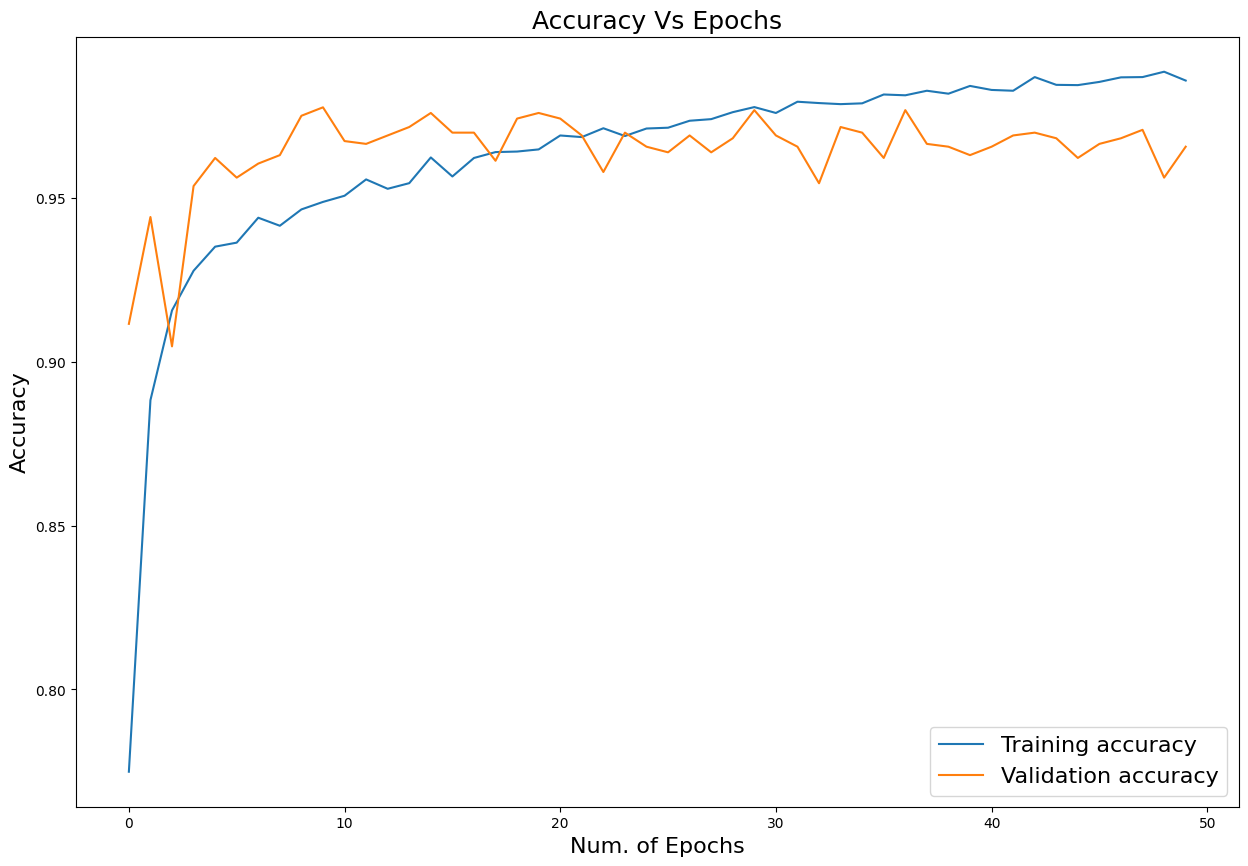

In [16]:
plt.figure(figsize=(15, 10))
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['Training accuracy','Validation accuracy'], fontsize=16)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
print("Accuracy Vs Epochs")
print("Training accuracy : 0.9816","\nValue accuracy : 1.0000")
plt.show()

## Saving the model

In [17]:
model.save("trained.h5")

#### Loading the saved model so that we can load the model which is already saved so lot of time can be saved and it can also be used for deployment.

In [18]:
from keras.models import load_model
model = load_model("trained.h5")

#### Loading the test data generator from drive

In [19]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

# Create an ImageDataGenerator instance for evaluation
eval_datagen = ImageDataGenerator(rescale=1/255)

# Use the correct path for the test directory
test_generator = eval_datagen.flow_from_directory(
    'C:\\Users\\SYED INAM\\Downloads\\Chest X-Rays.v4i.folder\\test',
    target_size=(300, 300),
    batch_size=128, 
    class_mode='binary'
)

# Evaluate the model using the test generator
eval_result = model.evaluate(test_generator, steps=624)
print('loss :', eval_result[0])
print('accuracy :', eval_result[1])

Found 582 images belonging to 2 classes.
624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9622 - loss: 0.2392
loss : 0.23929886519908905
accuracy : 0.962199330329895


C:\anacoda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


The accuracy of test data is :

### 96.4%

#### An image is used for prediction

In [20]:
import cv2
img= cv2.imread(r"C:\Users\SYED INAM\Downloads\Chest X-Rays.v4i.folder\train\NORMAL\NORMAL2-IM-1427-0001_jpeg.rf.7f6cacc7a1ed33f2f508da3fa598d771.jpg")
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


array([[0.03545675]], dtype=float32)

The prediction shows value as 0.0021 which is less than 0.5

so our model has to predict it as Normal which is done below.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediction: Normal


Text(0.5, 1.0, 'Prediction: Normal')

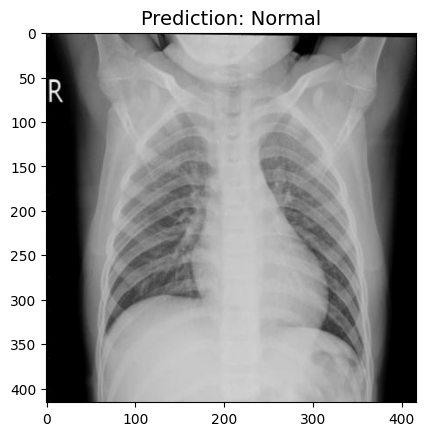

In [21]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

In [22]:
img= cv2.imread('/Users/SYED INAM/Downloads/Chest X-Rays.v4i.folder/test/PNEUMONIA/person88_virus_161_jpeg.rf.0b943861693ae62ecbed7fc66341d94d.jpg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[1.]], dtype=float32)

Here another image is used and the model predicted it as 0.999 which is greater than 0.5.

so it have be Pneumonia image which is predicted below.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Prediction: Pneumonia


Text(0.5, 1.0, 'Prediction: Pneumonia')

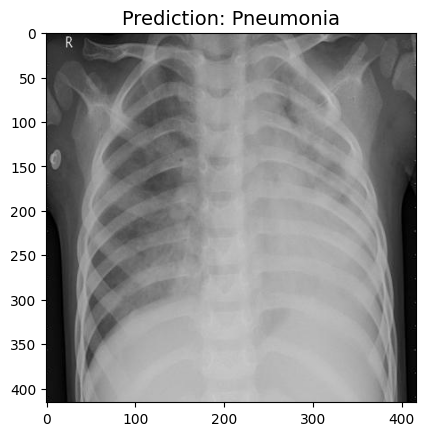

In [23]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

## Conclusion :

This model can be used in Healthcare industry in the radiological department.

It can be deployed to Xray machines.

This can help radiologist to predict the chest xray images easily and accurately.